In [1]:
import cv2
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from PIL import Image
import os
image_names=os.listdir('/content/drive/MyDrive/outdoor/hazy')
folder_path = '/content/drive/MyDrive/outdoor/hazy'
image_names.sort()
x=[]
for image_file in image_names:
    image_path = os.path.join(folder_path, image_file)
    arr=cv2.imread(image_path)
    #arr=cv2.cvtColor(arr,cv2.COLOR_BGR2RGB)
    #print(arr.shape)
    arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_LINEAR)

    x.append(arr2)

In [4]:
from PIL import Image
import os
image_names=os.listdir('/content/drive/MyDrive/outdoor/clear')
folder_path = '/content/drive/MyDrive/outdoor/clear'
image_names.sort()
y=[]
for image_file in image_names:
    image_path = os.path.join(folder_path, image_file)
    arr=cv2.imread(image_path)
    #arr=cv2.cvtColor(arr,cv2.COLOR_BGR2RGB)
    arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_LINEAR)
    y.append(arr2)

In [5]:
x=np.array(x)/255
y=np.array(y)/255

In [6]:
x[0].shape

(256, 256, 3)

In [7]:
import os

# Get the paths of the hazy and clear image folders
hazy_folder_path = '/content/drive/MyDrive/outdoor/hazy'
clear_folder_path = '/content/drive/MyDrive/outdoor/clear'

# Get the list of image names in each folder
hazy_image_names = os.listdir(hazy_folder_path)
clear_image_names = os.listdir(clear_folder_path)

# Print the number of images in each folder
print(f'Number of hazy images: {len(hazy_image_names)}')
print(f'Number of clear images: {len(clear_image_names)}')

Number of hazy images: 492
Number of clear images: 492


In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [9]:
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtest=np.array(xtest)
ytest=np.array(ytest)

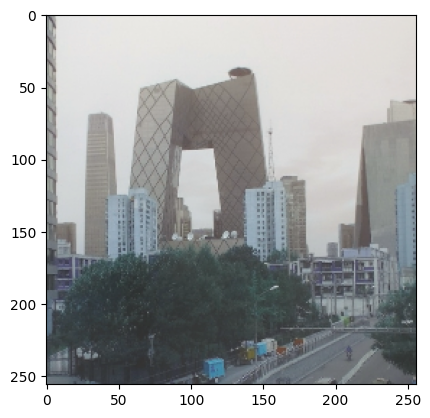

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x[10])

In [11]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Input,UpSampling2D, Dropout, BatchNormalization, Conv2DTranspose

from tensorflow.keras.models import Model

In [12]:
#encoder start
inputs=Input(shape=(256,256,3))

con1=Conv2D(32,5,activation='relu',padding='same')(inputs)
#con1=BatchNormalization()(con1)
maxp=MaxPooling2D(2,padding='same')(con1)
bn=BatchNormalization()(maxp)
#dp=Dropout(0.1)(bn)

con2=Conv2D(64,5,activation='relu',padding='same')(bn)
#con2=BatchNormalization()(con2)
maxp1=MaxPooling2D(2,padding='same')(con2)
bn=BatchNormalization()(maxp1)
#dp=Dropout(0.1)(bn)

con3=Conv2D(80,5,activation='relu',padding='same')(bn)
#con3=BatchNormalization()(con3)
maxp2=MaxPooling2D(2,padding='same')(con3)
bn=BatchNormalization()(maxp2)
#dp=Dropout(0.1)(bn)

con3=Conv2D(128,5,activation='relu',padding='same')(bn)
#con3=BatchNormalization()(con3)
maxp2=MaxPooling2D(2,padding='same')(con3)
bn=BatchNormalization()(maxp2)
#dp=Dropout(0.1)(bn)

con3=Conv2D(256,5,activation='relu',padding='same')(bn)
#con3=BatchNormalization()(con3)
maxp2=MaxPooling2D(2,padding='same')(con3)
bn=BatchNormalization()(maxp2)
#dp=Dropout(0.1)(bn)


#encoder end
#decoder start

con4=Conv2D(256,5,activation='relu',padding='same')(bn)
con4=BatchNormalization()(con4)
up=UpSampling2D(2)(con4)
#dp=Dropout(0.1)(up)

con4=Conv2D(128,5,activation='relu',padding='same')(up)
con4=BatchNormalization()(con4)
up=UpSampling2D(2)(con4)
#dp=Dropout(0.1)(up)

con4=Conv2D(80,5,activation='relu',padding='same')(up)
con4=BatchNormalization()(con4)
up=UpSampling2D(2)(con4)
#dp=Dropout(0.1)(up)

con5=Conv2D(64,5,activation='relu',padding='same')(up)
con5=BatchNormalization()(con5)
up1=UpSampling2D(2)(con5)
#dp=Dropout(0.1)(up1)

con6=Conv2D(32,5,activation='relu',padding='same')(up1)
con6=BatchNormalization()(con6)
up2=UpSampling2D(2)(con6)
#dp=Dropout(0.1)(up2)

out=Conv2D(3,4,activation='sigmoid',padding='same')(up2)
#ecoder end
model=Model(inputs=inputs,outputs=out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0     

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
histr=model.fit(x,y,epochs=1000,validation_data=[xtest,ytest],batch_size=5)#,callbacks=[early_stopping])

Epoch 1/1000
99/99 [==============================] - 26s 125ms/step - loss: 0.0605 - val_loss: 0.0962
Epoch 2/1000
99/99 [==============================] - 7s 75ms/step - loss: 0.0538 - val_loss: 0.0586
Epoch 3/1000
99/99 [==============================] - 6s 65ms/step - loss: 0.0543 - val_loss: 0.0554
Epoch 4/1000
99/99 [==============================] - 6s 65ms/step - loss: 0.0523 - val_loss: 0.0517
Epoch 5/1000
99/99 [==============================] - 6s 64ms/step - loss: 0.0532 - val_loss: 0.0609
Epoch 6/1000
99/99 [==============================] - 6s 64ms/step - loss: 0.0521 - val_loss: 0.0584
Epoch 7/1000
99/99 [==============================] - 6s 65ms/step - loss: 0.0522 - val_loss: 0.0572
Epoch 8/1000
99/99 [==============================] - 6s 65ms/step - loss: 0.0514 - val_loss: 0.0571
Epoch 9/1000
99/99 [==============================] - 6s 65ms/step - loss: 0.0510 - val_loss: 0.0525
Epoch 10/1000
99/99 [==============================] - 6s 65ms/step - loss: 0.0510 - val_

In [15]:
model.save('model_without_dropout.keras')

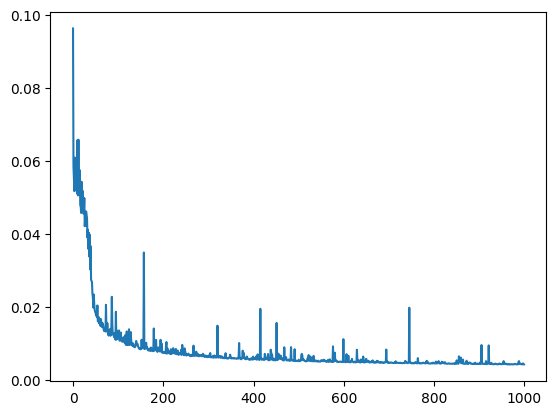

In [16]:
import matplotlib.pyplot as plt
plt.plot(histr.history['val_loss'])

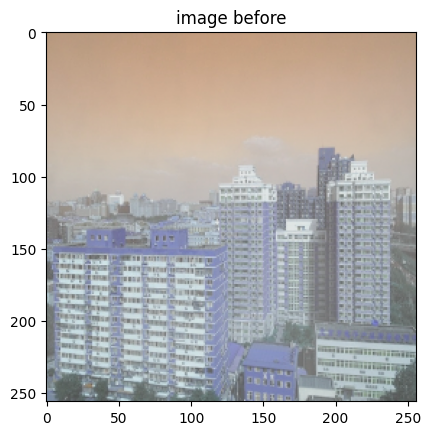

In [27]:
arr=cv2.imread('/content/drive/MyDrive/outdoor/hazy/0001_0.8_0.2.jpg')
#arr=cv2.cvtColor(arr,cv2.COLOR_BGR2RGB)
arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_LINEAR)
arr2=np.array([arr2])/255
plt.title('image before')
plt.imshow(arr2[0])

1/1 [==============================] - 0s 23ms/step


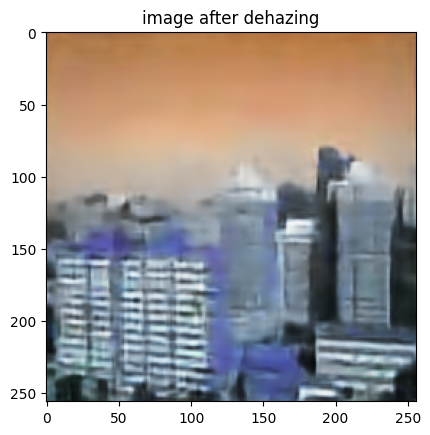

In [28]:
arr=cv2.imread('/content/drive/MyDrive/outdoor/hazy/0001_0.8_0.2.jpg')
#arr=cv2.cvtColor(arr,cv2.COLOR_BGR2RGB)
arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_LINEAR)
arr2=np.array([arr2])/255
#arr2=arr2/255
prerd=model.predict(arr2)
import matplotlib.pyplot as plt
prerd=prerd
plt.title('image after dehazing')
plt.imshow(prerd[0])